# [1] 지도학습 ( Supervised Learning)
입력(데이터) --- 타킷(정답) : 훈련 - 테스트 세트 나눔 ( 데이터 전처리 : scale이 다른것을 stand case(표준점수)로 맞춤
도미(dream), 빙어(smelt)의 길이, 무게 : featurn(특징)

In [1]:
# 35 개 도미 (bream) 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 14개 빙어(smelt) 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

count_fl = len(fish_length)
count_fw = len(fish_weight)

print(count_fl,count_fw)

49 49


In [2]:
import matplotlib.pyplot as plt

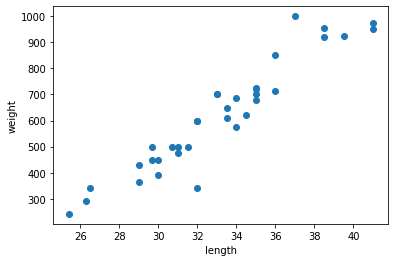

In [3]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# [2] numpy로 간결하게

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
import numpy as np

# [3] column_stack() 일렬로 세우고 연결함 ( 리스트를 일렬로 세우고 나란히 옆으로 붙임)

In [6]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

# [4] no.concatenate() : 리스트 처럼 일자로
ones() : 1 / zeros() : 0 으로 만들어줌

In [7]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# [5] 사이킷 런으로 훈련, 테스트 세트 나누기
train_test_split() : 기본으로 25% => 20% 로 change

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,random_state=42)

In [9]:
print(train_input.shape, train_input.shape)
print(train_target.shape,test_target.shape)
print(test_target) # --- 샘플링 편향이 존재함

(36, 2) (36, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


샘플링 편향 제거

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

# [6] 수상한 도미 한마리

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(train_input,train_target)

1.0

In [12]:
print(kn.predict([[25,150]])) # 예측 불가?

[0.]


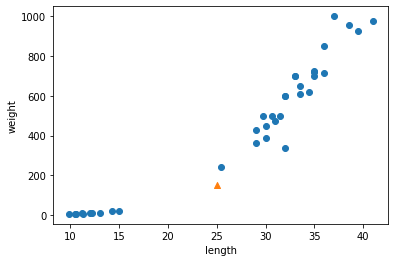

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

n_neighbors 기본 5로

In [14]:
distances, indexes = kn.kneighbors([[25,150]])

In [15]:
print(train_input[indexes])
print(train_target[indexes])

print(distances,indexes) # x축과 y축의 숫자가 다르다 y축이 너무 크다 (스케일리 다르다.)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


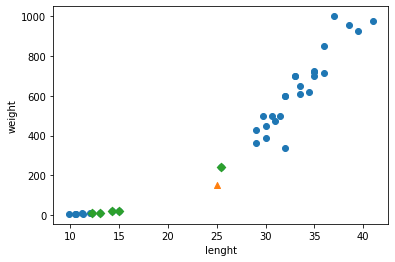

In [16]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
# plt.xlim(0,1000)
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

# 데이터 전처리 : scale이 다른것들 표준점수 ( stand scale) 로 맞춤
axis = 0 = 행 :열 / train_input => 36행 2열

In [17]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis= 0)

print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [18]:
train_scaled = (train_input - mean) / std

전처리 모델 훈련하기

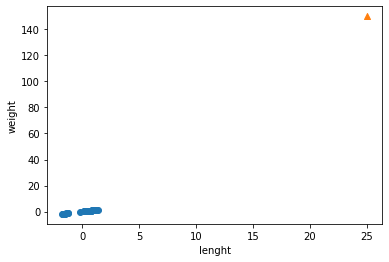

In [19]:
plt.scatter(train_scaled[:,0], train_scaled[:,0])
plt.scatter(25,150,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

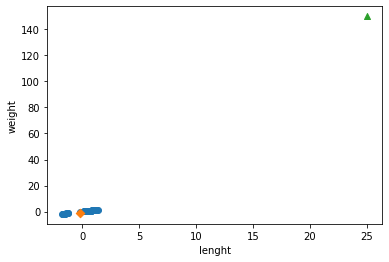

In [20]:
new = ([25,150] - mean) /std

plt.scatter(train_scaled[:,0], train_scaled[:,0])
plt.scatter(new[0],new[1],marker="D")
plt.scatter(25,150,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [21]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

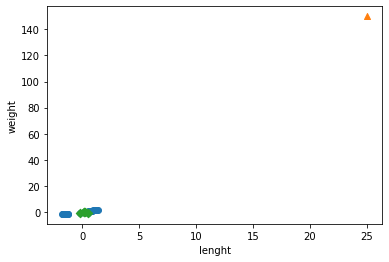

In [22]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker="D")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()